In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import mglearn
from IPython.display import display
plt.rc('font', family='Verdana')
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
from sklearn.model_selection import cross_val_score

C:\conda\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\conda\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


## Оценка и улучшение качества модели

In [3]:
data = pd.read_csv('ORGANICS.csv')
data = data.fillna(data.mean())

In [4]:
X = data[['DemAffl',  'DemAge', 'DemCluster', 'PromSpend', 'PromTime']]
y = data['TargetBuy']
y = y.astype('int')

In [5]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# разобъем данные на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
# создаем экземпляр модели и подгоняем его на обучающем наборе
DT = DecisionTreeClassifier(max_depth=35, min_samples_leaf = 15).fit(X_train, y_train)
# оцениваем качество модели на тестовом наборе
print("Правильность на обуч наборе: {:.2f}".format(DT.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(DT.score(X_test, y_test)))

Правильность на обуч наборе: 0.82
Правильность на тестовом наборе: 0.79


Найдем долю правильных ответов полученного алгоритма на обучающей выборке (в процентах). 

In [6]:
y_pred_train = DT.predict(X_train)
accuracy_score(y_pred_train, y_train)

0.8248635027299454

Теперь найдите долю правильных ответов полученного алгоритма на тестовой выборке (в процентах). Ответ округлите до двух знаков после запятой.

In [7]:
y_pred = DT.predict(X_test)
accuracy_score(y_pred, y_test)

0.7854571634269258

### Перекрестная проверка

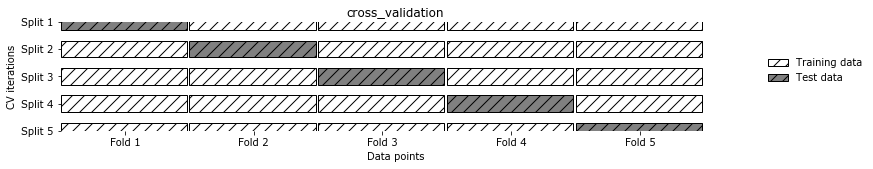

In [8]:
mglearn.plots.plot_cross_validation()

#### Перекрестная проверка в scikit-learn - 5 кратная cv=none

In [9]:
scores = cross_val_score(DT, X, y, cv=5)
print("Значения правильности перекрестной проверки: {}".format(scores))

Значения правильности перекрестной проверки: [0.77772778 0.78852643 0.78380202 0.77677768 0.79005401]


In [10]:
print("Средняя правильность перекрестной проверки: {:.2f}".format(scores.mean()))

Средняя правильность перекрестной проверки: 0.78


In [11]:
scores = cross_val_score(DT, X, y)
print("Значения правильности перекрестной проверки: {}".format(scores))

Значения правильности перекрестной проверки: [0.77767279 0.7825324  0.78128797]


C:\conda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [12]:
print("Средняя правильность перекрестной проверки: {:.2f}".format(scores.mean()))

Средняя правильность перекрестной проверки: 0.78


In [13]:
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(DecisionTreeClassifier(random_state=13),
                  param_grid = {'max_depth' : [3, 4, 5, 6, 7, 8, 9, 10, None],
                                'max_features' : ['auto', 'log2', None],
                                'min_samples_leaf' : range(1, 10),
                                'min_samples_split' : range(2, 10),
                                'criterion' : ['gini', 'entropy']},
                  cv=5, scoring='accuracy'
                  ).fit(X_train, y_train)

In [14]:
gs.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [15]:
gs.best_score_

0.8009239815203696

In [16]:
accuracy_score(gs.predict(X_train, y_train))

TypeError: predict() takes 2 positional arguments but 3 were given